# Generate plots
Run this notebook to generate used plots

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
import matplotlib.pyplot as plt

import plotting_tools
import utils
import numpy as np

/home/honza/Documents/school/fpgp/plotting_tools.py:80: UserWarning: 3 values were ignored for being too high
  warnings.warn(f'{vals[vals > ignore_tresh].size} values were ignored for being too high')


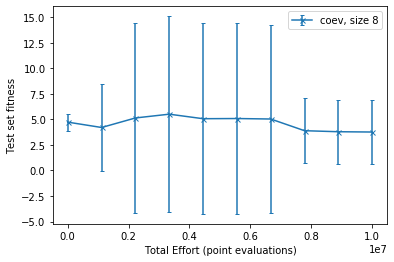

In [2]:
exp, names = [utils.LoadedLogs('data/f2_1e7_evals_coev_8predsz')], ['coev, size 8']
plotting_tools.compare_performance(exp, 'evals', 'test_set_f', ignore_tresh=200, method_names=names, xlabel='Total Effort (point evaluations)', ylabel='Test set fitness')
plt.savefig('plots/f2_1e7_fitness_over_evals_sz8.pdf')

/home/honza/Documents/school/fpgp/plotting_tools.py:80: UserWarning: 5 values were ignored for being too high
  warnings.warn(f'{vals[vals > ignore_tresh].size} values were ignored for being too high')


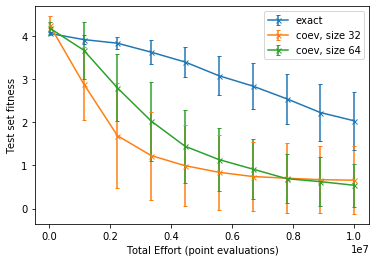

In [4]:
data_paths = ('data/f2_1e7_evals_exact', 
               'data/f2_1e7_evals_coev_32predsz', 'data/f2_1e7_evals_coev_64predsz')
exp, names = list(map(utils.LoadedLogs, data_paths)), ['exact', 'coev, size 32', 'coev, size 64']
plotting_tools.compare_performance(exp, 'evals', 'test_set_f', method_names=names, xlabel='Total Effort (point evaluations)', ylabel='Test set fitness')
plt.savefig('plots/f2_1e7_fitness_over_evals.pdf')

In [5]:
data = np.load(data_paths[0] + '/dataset.npz')
trn_x, trn_y = data['trn_x'], data['trn_y']

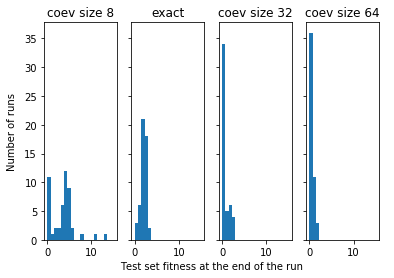

In [6]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel('Number of runs')
plt.xlabel('Test set fitness at the end of the run')
ax[0].set_title('coev size 8')
ax[1].set_title('exact')
ax[2].set_title('coev size 32')
ax[3].set_title('coev size 64')
ax[0].hist([r[-1]['test_set_f'] for r in utils.LoadedLogs('data/f2_1e7_evals_coev_8predsz')], bins=20, range=(0, 15))
ax[1].hist([r[-1]['test_set_f'] for r in utils.LoadedLogs('data/f2_1e7_evals_exact')], range=(0, 15), bins=20)
ax[2].hist([r[-1]['test_set_f'] for r in utils.LoadedLogs('data/f2_1e7_evals_coev_32predsz')], range=(0, 15), bins=20)
ax[3].hist([r[-1]['test_set_f'] for r in utils.LoadedLogs('data/f2_1e7_evals_coev_64predsz')], range=(0, 15), bins=20)
plt.savefig('plots/f2_1e7_fitness_hist.pdf')

/home/honza/Documents/school/fpgp/plotting_tools.py:80: UserWarning: 1 values were ignored for being too high
  warnings.warn(f'{vals[vals > ignore_tresh].size} values were ignored for being too high')


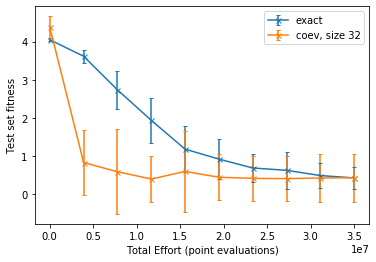

In [7]:
data_paths = ('data/f2_3.5e7_evals_exact', 'data/f2_3.5e7_evals_coev_32predsz')
exp, names = list(map(utils.LoadedLogs, data_paths)), ['exact', 'coev, size 32']
plotting_tools.compare_performance(exp, 'evals', 'test_set_f', method_names=names, xlabel='Total Effort (point evaluations)', ylabel='Test set fitness')
plt.savefig('plots/f2_3.5e7_fitness_over_evals.pdf')

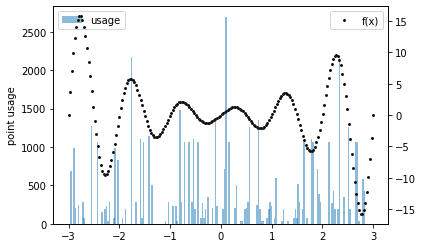

In [8]:
runs = list(list(exp)[1])
sorted_logs = sorted(runs, key=lambda x: x[-1]['test_set_f'])
log = sorted_logs[1]
plotting_tools.predictor_histogram(trn_x, trn_y, log)
plt.savefig('plots/f2_predictor_hist.pdf')
del sorted_logs
del runs

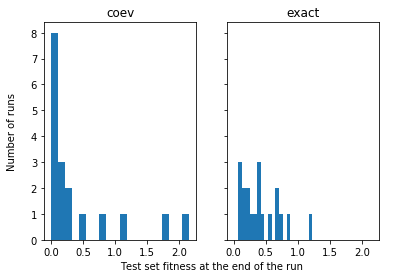

In [9]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel('Number of runs')
plt.xlabel('Test set fitness at the end of the run')
ax[0].set_title('coev')
ax[1].set_title('exact')
ax[0].hist([r[-1]['test_set_f'] for r in utils.LoadedLogs('data/f2_3.5e7_evals_coev_32predsz')], bins=20)
ax[1].hist([r[-1]['test_set_f'] for r in utils.LoadedLogs('data/f2_3.5e7_evals_exact')], bins=20)
plt.savefig('plots/f2_3.5e7_fitness_hist.pdf')

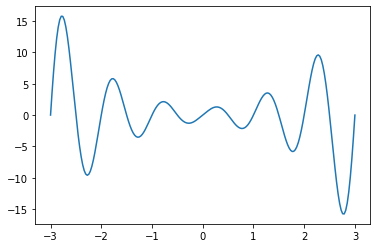

In [10]:
plt.plot(trn_x, trn_y)
plt.savefig('plots/f2_target.pdf')

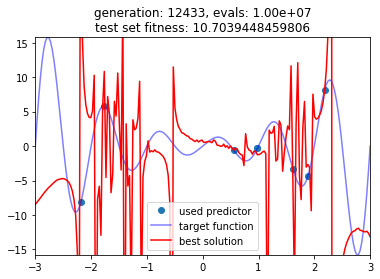

In [11]:
for l in utils.LoadedLogs('data/f2_1e7_evals_coev_8predsz'):
    log = l
    break
fig, ax = plt.subplots()
solutions_vals = log.select('best_sol_vals')
predictors = log.select('predictor')
test_set_f = log.select('test_set_f')
evals = log.select('evals')

pred_plot, = plt.plot([], [], ls=' ', marker='o', label='used predictor')
target_plot, = plt.plot([], [], color='blue', alpha=0.5, label='target function')
sol_plot, = plt.plot([], [], color='red', label='best solution')
ax.set_xlim(min(trn_x), max(trn_x))
ax.set_ylim(min(trn_y), max(trn_y))
target_plot.set_data(trn_x, trn_y)
s = '{:.2e}'.format(evals[-1])
ax.set_title(f'generation: {len(log)}, evals: {s}\ntest set fitness: {test_set_f[-1]}')
pred_plot.set_data(trn_x[predictors[-1]], trn_y[predictors[-1]])
sol_plot.set_data(trn_x, solutions_vals[-1])
ax.legend()
plt.savefig('plots/f2_failed_run.pdf')